In [5]:
%reset -f
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy.interpolate import griddata
from statsmodels.formula.api import glm
import matplotlib.pyplot as plt

In [32]:
df = pd.read_csv('butterfly.txt', sep=' ')
x_val = df['x'].values[:12]
y_val = df['y'].values[:12]
t_val = np.linspace(0.1, 1.0, 10)
E_val = np.zeros(10)
sd_val = np.zeros(10)

for i in range(len(t_val)):
    E_current = 0
    var_current = 0
    for j in range(12):
        E_current += (-1)**(j)*y_val[j]*t_val[i]**(j+1)
        var_current += y_val[j]*t_val[i]**(2*(j+1))
    E_val[i] = E_current
    sd_val[i] = np.sqrt(var_current)

print("x values: ", x_val)
print("y values: ", y_val)
print()
print("t values: ", t_val)
print("E values: ", E_val)
print("sd values: ", sd_val)


x values:  [ 1  2  3  4  5  6  7  8  9 10 11 12]
y values:  [118  74  44  24  29  22  20  19  20  15  12  14]

t values:  [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
E values:  [11.10186983 20.96168825 29.79147831 37.79270261 45.17138672 52.14686831
 58.93398626 65.62224626 71.73911583 75.        ]
sd values:  [ 1.08969915  2.200291    3.35458412  4.57971899  5.91113748  7.40090872
  9.13903129 11.31897712 14.47035716 20.27313493]


In [46]:
df = pd.read_csv('baseball.txt', sep=' ')
n = 180
mle_val = df['MLE'].values
x_val = 2*(n+0.5)**(1/2)*np.asin(((n*mle_val + 0.375)/(n+0.75))**(1/2))
mean_val = np.mean(x_val)
B_val = 1 - (len(x_val)-3)/np.sum((x_val - mean_val)**2)
mu_JS_val = mean_val + (B_val)*(x_val - mean_val)
p_JS_val = 1/n*((n+0.75)*(np.sin(mu_JS_val/(2*(n+0.5)**(1/2))))**2  - 0.375)

print("The JS estimators for n = 180 for each player is given by: ")
print(p_JS_val)


The JS estimators for n = 180 for each player is given by: 
[0.31386246 0.30594354 0.29867231 0.29138682 0.27676237 0.27676237
 0.26941765 0.25397283 0.24653663 0.23906284 0.23906284 0.23154692
 0.23154692 0.23154692 0.22398382 0.22398382 0.21636791 0.17724071]


In [6]:
df = pd.read_csv('galaxy.txt', sep=' ')
y_val = df.to_numpy().reshape(-1)
r_val = np.tile(np.arange(1,16), 18)
m_val = np.repeat(np.arange(18,0,-1), 15)
r2_val = r_val**2
rm_val = r_val*m_val
m2_val = m_val**2
X_int = np.column_stack((np.ones(270), r_val, m_val, r2_val, rm_val, m2_val))
X = np.column_stack((r_val, m_val, r2_val, rm_val, m2_val))
X_df = pd.DataFrame(X, columns=['r', 'm', 'r^2', 'rm', 'm^2'])
#X_int_df = pd.DataFrame(X_int, columns=['Intercept', 'r', 'm', 'r^2', 'rm', 'm^2'])

# Fit the GLM model (Logistic Regression: Poisson family, default link function is log)
model = sm.GLM(y_val, X_df, family=sm.families.Poisson())
result = model.fit()
# Print the results
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  270
Model:                            GLM   Df Residuals:                      265
Model Family:                 Poisson   Df Model:                            4
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -324.86
Date:                Fri, 14 Feb 2025   Deviance:                       244.69
Time:                        21:41:20   Pearson chi2:                 1.26e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.9129
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
r             -0.2918      0.062     -4.674      0.0

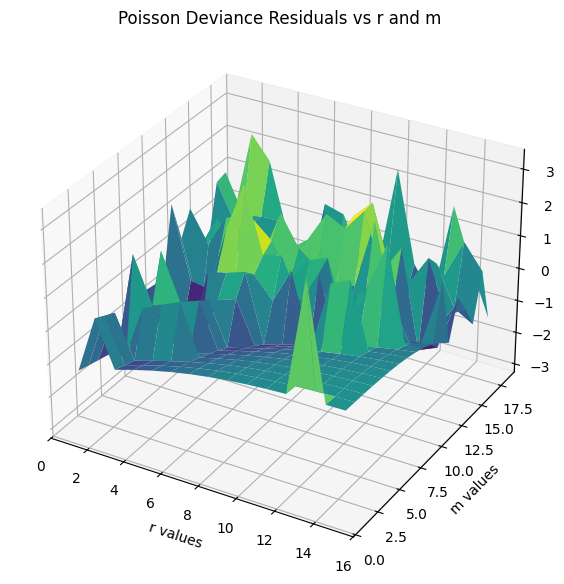

In [11]:
# Get the predicted values
y_pred = model.predict(result.params, X_df)
epsilon = 1e-10 # Small value to prevent log(0) or division by zero
y_safe = np.where(y_val == 0, epsilon, y_val) # Ensure observed values are not zero to avoid NaN

# Calculate the deviance residuals
deviance_residuals = np.sign(y_val - y_pred) * np.sqrt(2 * y_safe * (y_pred/y_safe - 1 - np.log(y_pred/y_safe) ))
													   
# Creating a meshgrid for 3D plot
r_mesh, m_mesh = np.meshgrid(np.arange(1,16), np.arange(18,0,-1))
z_val = deviance_residuals.reshape(r_mesh.shape)

# 3D plot for deviance residuals vs both predictors
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(r_mesh, m_mesh, z_val, cmap='viridis')
ax.set_xlabel('r values')
ax.set_ylabel('m values')
ax.set_zlabel('Deviance Residuals')
ax.set_title('Poisson Deviance Residuals vs r and m')

plt.show()

In [12]:
print(deviance_residuals)

[-0.2851074   2.28021513  1.5886194  -0.5367683  -2.31097023 -1.15804689
 -0.81527994 -0.5101242  -0.82218562  2.37346595 -0.39603622 -1.27386519
  1.70840178  0.02560697 -1.41494239  1.1491101  -0.0505324   0.06796326
  0.08339242 -3.12268683 -0.38998176  0.04635669 -0.61433477 -0.77254606
 -0.43253251 -1.12440829 -0.13521296 -0.205412    0.9916877   0.25228868
  1.05564775 -0.08528518  0.10046757 -0.32759856 -0.70271133 -1.56867357
  1.28442493  1.12531445 -0.05165785 -1.33790469 -0.2247591  -0.41781181
  0.40476459 -0.80337003 -1.13638432 -0.5152072  -0.87464577  0.71240541
 -0.18992984  0.05292415 -0.68148629 -1.37586199 -0.84214557  1.44568429
  1.9989643   0.11192012 -0.11879516  0.79994824 -0.79712769 -0.43397658
 -0.56361242  0.55330387 -0.3978551  -0.03245212 -0.22804132  0.18500526
  0.63372387  1.57251953  1.28805824  1.9637056   0.27097043  1.18126036
 -1.7973105  -1.5491597   0.15597401  0.88132298 -0.07451759  0.89497819
  1.20969665  0.02897405  1.51283056  0.58310831  0